In [1]:
%load_ext autoreload
%autoreload 2

from Shared.shared import *
from Shared.specific_CNB_sim import *
from Shared.specific_CNB_decay import *

sim_name = f"Dopri5_1k"
sim_folder = f"sim_output/{sim_name}"
fig_folder = f"figures_local/{sim_name}"
Cl_folder = f"Shared/Cls"
Delta_folder = f"Shared/Deltas"
nu_m_range = jnp.load(f"{sim_folder}/neutrino_massrange_eV.npy")
nu_m_picks = jnp.array([0.01, 0.05, 0.1, 0.2, 0.3])*Params.eV
simdata = SimData(sim_folder)


In [2]:
number_densities_monopole_d =[]
number_densities_monopole_p =[]
number_densities_monopole_nd =[]

number_densities_powerspec_d =[]
number_densities_powerspec_p =[]
number_densities_powerspec_nd =[]

## CNB anisotropy x DM line-of-sight skymaps

### lifetime = 0.1T

In [3]:
gamma = '0.1T'

nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo5_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo5_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo5.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo5.npy")

nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''

number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))
number_densities_powerspec_d.append(nu_dens_d)
number_densities_powerspec_p.append(nu_dens_p)
number_densities_powerspec_nd.append(nu_dens_nd)

In [4]:
import jax
from Shared.specific_CNB_decay import *
gamma = '0.5T'
nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo5_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo5_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo5.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo5.npy")

nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''


number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))
number_densities_powerspec_d.append(nu_dens_d)
number_densities_powerspec_p.append(nu_dens_p)
number_densities_powerspec_nd.append(nu_dens_nd)

### lifetime = T

In [5]:
gamma = 'T'
nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo5_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo5_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo5.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo5.npy")

nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''



number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))

number_densities_powerspec_d.append(nu_dens_d)
number_densities_powerspec_p.append(nu_dens_p)
number_densities_powerspec_nd.append(nu_dens_nd)

### lifetime = 2T

In [6]:
gamma = '2T'
nu_vectors_d = jnp.load(f"{sim_folder}/vectors_halo5_d_{gamma}.npy")
nu_vectors_p = jnp.load(f"{sim_folder}/vectors_halo5_p_{gamma}.npy")
nu_vectors_nd = jnp.load(f"{sim_folder}/vectors_halo5.npy")
#nu_vectors = jnp.load(f"{sim_folder}/vectors_halo5.npy")
nu_dens_nd = decay.number_densities_all_sky(
    v_arr=nu_vectors_nd[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

nu_dens_d = decay.number_densities_all_sky(
    v_arr=nu_vectors_d[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())

'''nu_dens_p = decay.number_densities_all_sky(
    v_arr=nu_vectors_p[..., 3:],
    m_arr=nu_m_range,
    pix_sr=simdata.pix_sr,
    args=Params())'''

nu_dens_p =nu_dens_nd - nu_dens_d


# Choose which halo to plot
halo_i = 1

# Load associated origID of chosen halo
halo_indices = jnp.load(
    f"{sim_folder}/halo_batch_0.6-2.0x1e+12.0_Msun_indices.npy")
haloID = halo_indices[halo_i-1]

# Choose which neutrino mass to plot
m_val = 0.05
m_val_p =0.06
m_idx = jnp.abs(nu_m_range - m_val).argmin()
m_idx_p = jnp.abs(nu_m_range - m_val_p).argmin()


# Load corresponding number densities
CNB_dens_1mass_d = nu_dens_d[m_idx]
CNB_dens_1mass_p = nu_dens_p[m_idx_p]
CNB_dens_1mass_nd = nu_dens_nd[m_idx_p]

'''print(np.sum(CNB_dens_1mass_p))
print(np.sum(CNB_dens_1mass_nd))
print(np.sum(CNB_dens_1mass_d))


ic(CNB_dens_1mass_d.shape)
ic(CNB_dens_1mass_d.min(), CNB_dens_1mass_d.max())
ic(CNB_dens_1mass_nd.min(), CNB_dens_1mass_nd.max())
ic(CNB_dens_1mass_p.min(), CNB_dens_1mass_p.max())

fig_paths = [
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.pdf",
    f"{fig_folder}/skymaps_CNBxDM_{sim_name}.png",
]

CNB_skymap_d, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val, 
    CNB_dens=CNB_dens_1mass_d, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_nd, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_nd, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())

CNB_skymap_p, DM_halo_skymap = SimPlot.skymaps_CNBxDM(
    nu_mass=m_val_p, 
    CNB_dens=CNB_dens_1mass_p, 
    DM_halo_pos=jnp.load(f"Data/halo_grids/DM_pos_origID{haloID}_snap_0036.npy"), 
    init_xyz=jnp.load(f"{sim_folder}/init_xyz_halo{halo_i}.npy"), 
    fig_paths=fig_paths,
    args=Params())'''


number_densities_monopole_d.append(np.sum(CNB_dens_1mass_d))
number_densities_monopole_p.append(np.sum(CNB_dens_1mass_p))
number_densities_monopole_nd.append(np.sum(CNB_dens_1mass_nd))
number_densities_powerspec_d.append(nu_dens_d)
number_densities_powerspec_p.append(nu_dens_p)
number_densities_powerspec_nd.append(nu_dens_nd)

In [7]:
gammas =['0.1T','0.5T','T','2T']
print(np.shape(number_densities_monopole_p))
print(number_densities_monopole_p)
print(number_densities_monopole_nd)

(4,)
[Array(9.95653906e-06, dtype=float64), Array(0.00010942, dtype=float64), Array(0.00243341, dtype=float64), Array(0.01244568, dtype=float64)]
[Array(57.13095655, dtype=float64), Array(57.13095655, dtype=float64), Array(57.13095655, dtype=float64), Array(57.13095655, dtype=float64)]


(1, 4)
(4,)
[1.75882239e-07 1.93283431e-06 4.29861831e-05 2.19852824e-04]


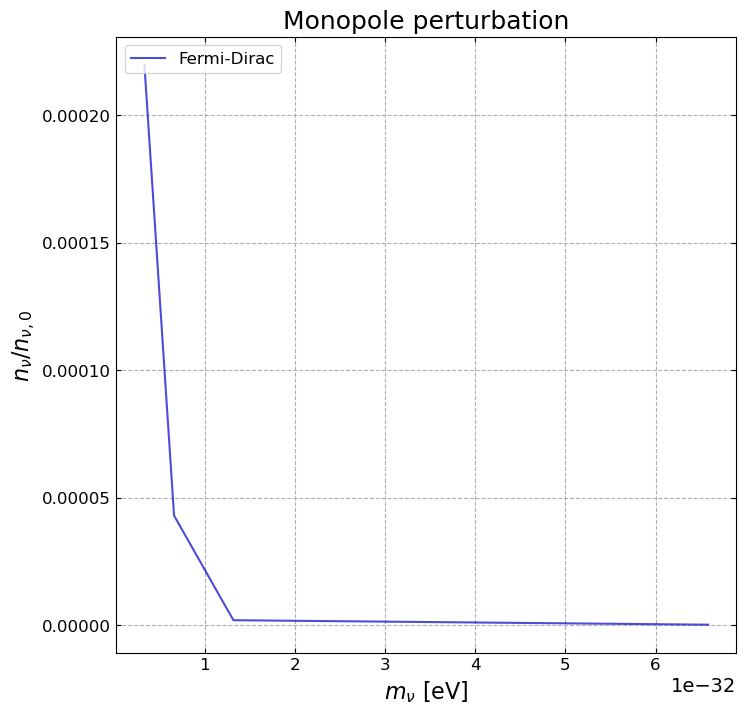

In [9]:
colors = ["mediumblue"]
labels = ["Fermi-Dirac"]

fig_paths = [
    f"{fig_folder}/overdensity_band_{sim_name}_linear.pdf",
    f"{fig_folder}/overdensity_band_{sim_name}_linear.png"
]
number_densities_monopole_d = np.array(number_densities_monopole_d).reshape(1,4)
print(np.shape(number_densities_monopole_d))
print(np.shape(gammas))
eta = 5*1e-1
gammas = np.array([(1/0.1)*10**(-17)/s,(1/0.5)*10**(-17)/s,(1/1)*10**(-17)/s,(1/2)*10**(-17)/s])
SimPlot.overdensity_band_decay(
    dens_FD=np.array(number_densities_monopole_d),
    m_arr_FD=gammas,
    colors=colors,
    labels=labels,
    plot_xlims=None,
    plot_ylims=None,
    plot_log=False,
    fig_paths=fig_paths,
    args=Params())

Input array must have shape (halos, masses, Npix). Here: (4, 50, 768)


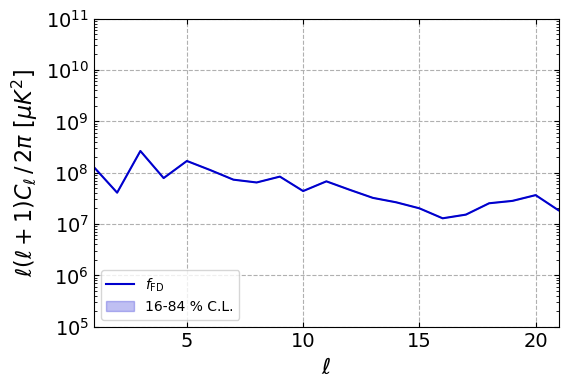

In [10]:
m_pick = 0.05
pix_dens_FD =np.array(number_densities_powerspec_d)
def power_spectra_FDxPF_decay(
    m_pick, pix_dens_FD, y_lims, sim_dir, fig_dir, args):
    
    m_specs = jnp.array([0.01, 0.05, 0.1, 0.2, 0.3])*args.eV
    m_range = jnp.load(f"{sim_dir}/neutrino_massrange_eV.npy")

    mPF_i = jnp.abs(m_specs - m_pick).argmin()
    # mFD_i = jnp.abs(m_range - m_pick).argmin()
    mFD_i = jnp.abs(m_specs - m_pick).argmin()

    halo_num = len(pix_dens_FD)

    power_spectra_FD_l = []
    for halo_i in range(halo_num):

        m_nu = m_specs[mFD_i]

        FD_skymap = pix_dens_FD[halo_i, mFD_i]

        # Convert maps of neutrino densities to temperatures.
        cm3 = args.cm**3
        FD_Tmap = np.cbrt((FD_skymap*(1/cm3)*4*args.Pi**2) / (args.g_nu*3*zeta(3)))

        T_unit = args.muK
        FD_Tmap /= T_unit

        # Compute power spectrum of number density all-sky map.
        cl_FD = hp.sphtfunc.anafast(FD_Tmap, lmax=None)

        ell = jnp.arange(len(cl_FD))

        # Unit to compare to similar figures in literature.
        # scaling = Primordial.Cl_scaling
        scaling = 1  # if Tmaps already in muK
        
        power_spectrum_FD = ell * (ell+1) * cl_FD * scaling / (2*args.Pi)

        power_spectra_FD_l.append(power_spectrum_FD)


    # Convert lists to arrays
    power_spectra_FD = jnp.array(power_spectra_FD_l)

    # Compute median and percentile ranges for Fermi-Dirac spectra
    power_median_FD = jnp.median(power_spectra_FD, axis=0)
    power_perc2p5_FD = jnp.percentile(power_spectra_FD, q=2.5, axis=0)
    power_perc97p5_FD = jnp.percentile(power_spectra_FD, q=97.5, axis=0)
    power_perc16_FD = jnp.percentile(power_spectra_FD, q=16, axis=0)
    power_perc84_FD = jnp.percentile(power_spectra_FD, q=84, axis=0)

    fig = plt.figure(figsize =(6, 4))
    fig.tight_layout()
    ax1 = fig.add_subplot(111)

    FD_color = "mediumblue"
    ax1.semilogy(
        ell, power_median_FD, color=FD_color, 
        label=r"$f_{\rm FD}$")
    # ax1.fill_between(
    #     ell, power_perc2p5_FD, power_perc97p5_FD, 
    #     color=FD_color, alpha=0.15, label='2.5-97.5 % C.L.')
    ax1.fill_between(
        ell, power_perc16_FD, power_perc84_FD, 
        color=FD_color, alpha=0.25, label='16-84 % C.L.')
    

    # ax1.set_title(fr"Power spectra comparison $m_\nu = ${m_pick} eV")
    ax1.set_xlabel("$\ell$")
    # ax1.set_xlim(1,np.max(ell))
    ax1.set_xlim(1,21)
    ax1.set_ylabel(r"$\ell(\ell+1)C_{\ell} \, / \, 2\pi \,\, [\mu K^2]$")

    if y_lims is not None:
        ax1.set_ylim(y_lims[0], y_lims[1])

    ax1.grid(True, which="major", linestyle="dashed")
    ax1.legend(loc='lower left', prop={'size':10})

    plt.savefig(
        f"{fig_dir}/power_spectra_FD_vs_PF_decay_{m_pick}eV.pdf", 
        bbox_inches="tight")
    plt.savefig(
        f"{fig_dir}/power_spectra_FD_vs_PF_decay_{m_pick}eV.png", 
        bbox_inches="tight")
    plt.show(); plt.close()


N0_pix = Params.N0 / simdata.Npix
skymap_norm = N0_pix / (Params.cm**-3)
print(f"Input array must have shape (halos, masses, Npix). Here:", pix_dens_FD.shape)
for m_pick in nu_m_picks[2:3]:
    power_spectra_FDxPF_decay(
        m_pick=m_pick, 
        pix_dens_FD=pix_dens_FD - skymap_norm, 
        # y_lims=None,
        y_lims=(1e5, 1e11),
        sim_dir=sim_folder, 
        fig_dir=fig_folder,
        args=Params())